# Análisis de Series Temporales
## Trabajo Práctico Nro. 1

Estudiante: Esp. Ing. Mariano Martín Gualpa (mgualpa@gmail.com)

# 1. Consigna

1) Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de -suscriptores-de-telefonia-movil-miles-de-minutos/

2) Explorar los datos, visualizarlos.

3) Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing).

4) Visualizar los resultados y evaluarlos, comparando ambas implementaciones.


# 2. Desarrollo

## 2.1. Carga y Limpieza de Datos

Correspondiente al punto 1: Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de -suscriptores-de-telefonia-movil-miles-de-minutos/

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
green='#227722'
blue='#1F77B4'
black='#000000'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
data=pd.read_csv('datasets/Telefonia_movil.csv', index_col='Periodo', parse_dates=True, dayfirst=True)
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
Periodo,,,,,
Abr-Jun 2017,2017,2,15.315.167,6293563,21608730
Jul-Sept 2017,2017,3,15.106.275,6308373,21414647
Oct-Dic 2017,2017,4,14.164.552,5380710,19545262
Ene-Mar 2018,2018,1,13.851.254,5958717,19809971
Abr-Jun 2018,2018,2,14.388.755,6290155,20678910


In [5]:
data.isnull().sum(axis = 0)

Año                                   0
Trimestre                             0
Minutos pospago salientes (miles)     0
Minutos prepago salientes (miles)     0
Total de minutos salientes (miles)    0
dtype: int64

In [6]:
if (data["Minutos pospago salientes (miles)"].dtype != int):
    data["Minutos pospago salientes (miles)"] = data["Minutos pospago salientes (miles)"].str.replace(".","").astype(int)
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
Periodo,,,,,
Abr-Jun 2017,2017,2,15315167,6293563,21608730
Jul-Sept 2017,2017,3,15106275,6308373,21414647
Oct-Dic 2017,2017,4,14164552,5380710,19545262
Ene-Mar 2018,2018,1,13851254,5958717,19809971
Abr-Jun 2018,2018,2,14388755,6290155,20678910


In [7]:
data.index = data[['Año', 'Trimestre']].apply(lambda x: '{}Q{}'.format(x[0],x[1]), axis=1)
data.index = pd.to_datetime(data.index)
data.index = data.index.to_period(freq='Q')
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
2017Q2,2017,2,15315167,6293563,21608730
2017Q3,2017,3,15106275,6308373,21414647
2017Q4,2017,4,14164552,5380710,19545262
2018Q1,2018,1,13851254,5958717,19809971
2018Q2,2018,2,14388755,6290155,20678910


In [8]:
if ({"Año", "Trimestre"}.issubset(data.columns)):
    data = data.drop(columns=["Año", "Trimestre"])
data.tail()

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
2017Q2,15315167,6293563,21608730
2017Q3,15106275,6308373,21414647
2017Q4,14164552,5380710,19545262
2018Q1,13851254,5958717,19809971
2018Q2,14388755,6290155,20678910


In [9]:
pd.to_numeric(data['Minutos pospago salientes (miles)'])
pd.to_numeric(data['Minutos prepago salientes (miles)'])
pd.to_numeric(data['Total de minutos salientes (miles)'])
data.dtypes

Minutos pospago salientes (miles)     int64
Minutos prepago salientes (miles)     int64
Total de minutos salientes (miles)    int64
dtype: object

## 2.2. Análisis Exploratorio.

Correspondiente al punto 2: Explorar los datos, visualizarlos.

In [10]:
data.tail()

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
2017Q2,15315167,6293563,21608730
2017Q3,15106275,6308373,21414647
2017Q4,14164552,5380710,19545262
2018Q1,13851254,5958717,19809971
2018Q2,14388755,6290155,20678910


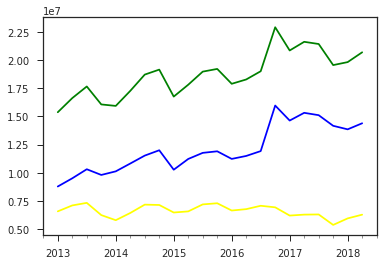

In [11]:
data[:]['Minutos pospago salientes (miles)'].plot(color='blue',figsize=(6,4));
data[:]['Minutos prepago salientes (miles)'].plot(color='yellow',figsize=(6,4));
data[:]['Total de minutos salientes (miles)'].plot(color='green',figsize=(6,4));

In [12]:
serie_name = 'Total de minutos salientes (miles)'
y=data[serie_name]

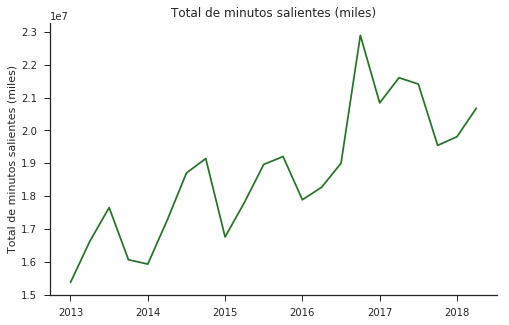

In [13]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=green)
ax.set_xlabel('')
ax.set_ylabel(serie_name)
ax.set_title(serie_name)
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

In [14]:
y.describe().round(2)

count          22.00
mean     18701180.05
std       1990542.72
min      15368060.00
25%      17357310.00
50%      18834516.00
75%      19743793.75
max      22899656.00
Name: Total de minutos salientes (miles), dtype: float64

## 2.3. Implementación de Modelos

Correspondiente al punto 3: Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing).

### 2.3.1. Random Walk (Naïve)

In [15]:
h = 4
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2018Q3    20678910
2018Q4    20678910
2019Q1    20678910
2019Q2    20678910
Freq: Q-DEC, dtype: int64

In [16]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

1464911.401

In [17]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2018Q3,1.780774e+07,2.355008e+07
2018Q4,1.661846e+07,2.473936e+07
2019Q1,1.570589e+07,2.565193e+07
2019Q2,1.493656e+07,2.642126e+07


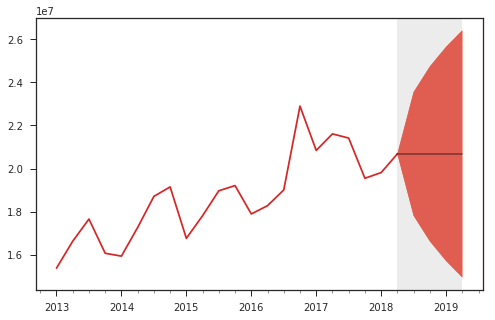

In [18]:
from plotting import fanchart
point_pred = (intv[0]+intv[1])/2
fig, ax = fanchart(y['2010':],point_pred,intv,intv,intv)
plt.show()

In [19]:
naive = y.copy()
naive = naive.shift(1)

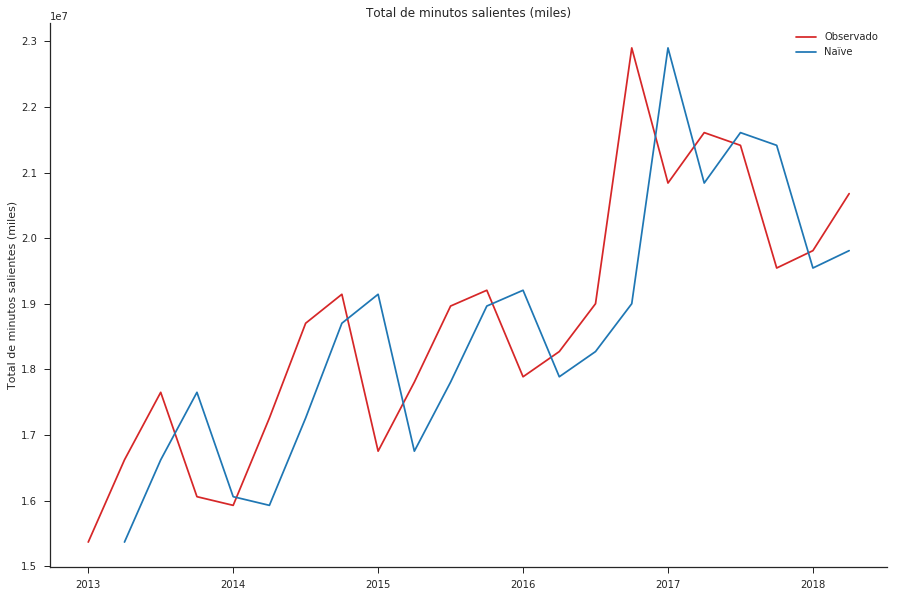

In [20]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color=red, label='Observado')
naive.plot(color=blue, label='Naïve')
ax.set_xlabel('')
ax.set_ylabel(serie_name)
ax.set_title(serie_name)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

### 2.3.2. Exponential Smoothing

#### 2.3.2.1. Modelo y Ajuste con Exponential Smoothing

In [21]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
alpha_ses = model_ses.model.params['smoothing_level']
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
aic_ses = model_ses.aic
bic_ses = model_ses.bic
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_ses))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))



 Smoothing parameter: alpha  0.587
 In-sample fit:
 MSE               1866274414059.412
 AIC               625.609
 BIC               627.791


In [22]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -342.021
 AIC               690.043
 BIC               693.316


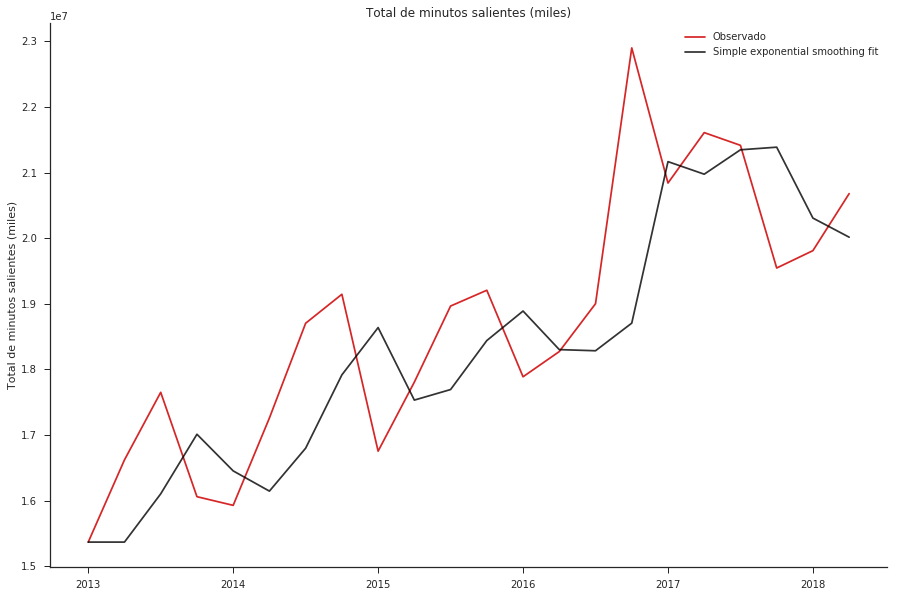

In [23]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color=red, label='Observado')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel(serie_name)
ax.set_title(serie_name)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

#### 2.3.2.2. Diagnóstico del Modelo Generado con Exponential Smoothing

In [24]:
resid=y-fitted_ses 

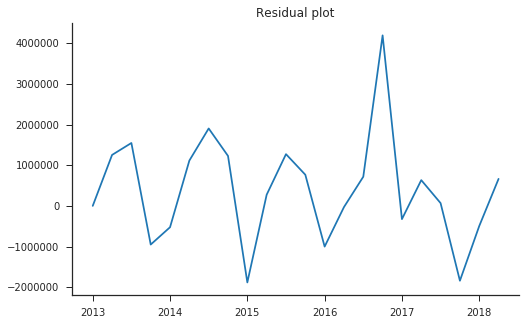

In [25]:
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

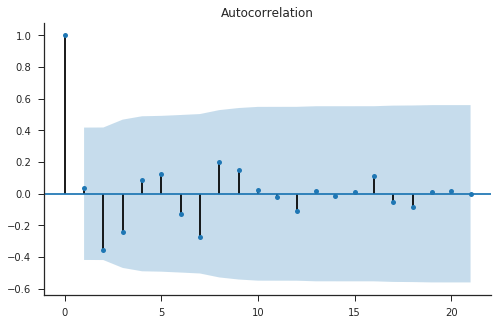

In [26]:
lags_num = len(resid) - 1
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=lags_num, ax=ax)
sns.despine()
plt.show()

/Users/mgualpa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


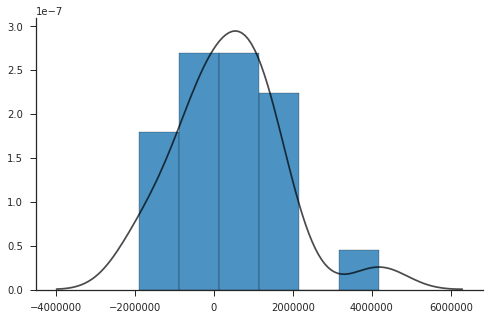

In [27]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

#### 2.3.2.3. Pronóstico con el Modelo Generado con Exponential Smoothing

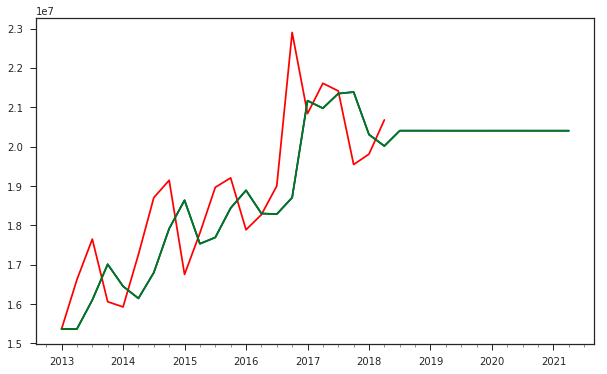

In [28]:
h=12
w=h*10
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red',figsize=(10,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

# 3. Validación de Modelos

In [29]:
# Real time forecasting - use it as a template - expanding window

validation=y['2016Q1':].index 
start = y.index.get_loc('2016Q1') 

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    actual.append(y.iloc[i]) # actual value
    pred1.append(y.iloc[i-1]) # random walk forecast
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)

results_sm.tail()

,RW,SES,Actual
2017Q2,20840252.0,2.089272e+07,21608730.0
2017Q3,21608730.0,2.132955e+07,21414647.0
2017Q4,21414647.0,2.138336e+07,19545262.0
2018Q1,19545262.0,2.036427e+07,19809971.0
2018Q2,19809971.0,1.998359e+07,20678910.0


In [30]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,1637219.507,543527.199
SES,1696867.229,564212.387


# 4. Comparación y Selección del Modelo 

Como puede observarse en la sección anterior, el menor RMSE de validación para los datos utilizados corresponde al modelo de Random Walk (Naïve), por lo que sería conveniente seleccionar este modelo de entre los dos estudiados. Debe considerarse además, que la desviación estándar de este error es tambien alta y que la cantidad de datos disponibles utilizados eran pocos. Una buena análisis debería incluir otros modelos que pudieran incorpodar mejor otra información de la serie, tales como la tendencia. Sería interesante probar los resultados con un modelo de Exponencial Smoothing Holt-Winter.

A continuación se presentan los datos comparados, tanto de predicción de ambos modelos vs la serie original como de residuos. Es interesante observar la penalización de la excesiva memoria del método Exponencial Smoothing, que en este caso perjudica el desempeño del modelo frente a uno mucho mas simple.

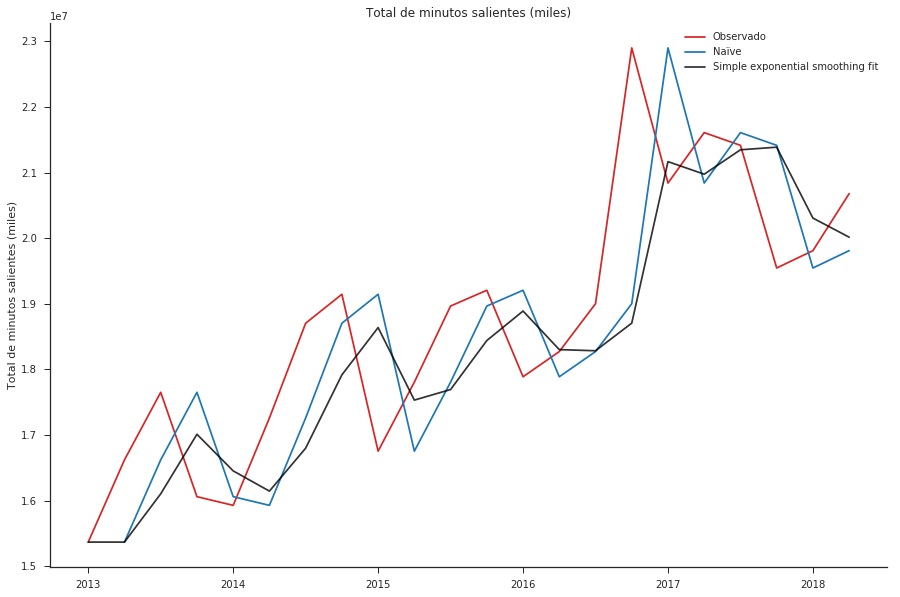

In [31]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color=red, label='Observado')
naive.plot(color=blue, label='Naïve')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel(serie_name)
ax.set_title(serie_name)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

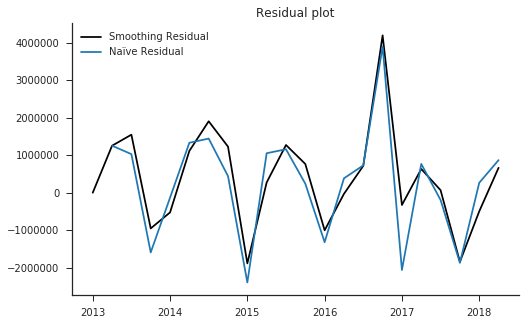

In [32]:
resid_naive=y-y.shift(1) # the shift lags the series by one period

fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=black, label='Smoothing Residual')
resid_naive.plot(color=blue, label='Naïve Residual')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
plt.legend(loc='best')
sns.despine()
plt.show()